# 📊 Parcial – Análisis estratégico de reseñas de Amazon con ayuda de ChatGPT

**Curso:** Análisis de Redes Sociales

**Caso de negocio:**
Una empresa de tecnología está evaluando lanzar una nueva línea de accesorios para móviles. Para ello, necesita analizar las opiniones de los usuarios sobre productos similares en Amazon. Tu rol es analizar las reseñas disponibles y brindar conclusiones útiles para tomar decisiones estratégicas.

Debes usar ChatGPT para clasificar las reseñas en dos dimensiones:
`review_content`
- Sentimiento: Muy negativo, Negativo, Neutro, Positivo, Muy positivo
- Tema (Motivo): Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro

Además para su analisis tiene la columna Category y Rating. Category hace referencia al producto y Rating a la calificacion del cliente.

*Tiene estas preguntas guias disponibles que tiene que comparar pero puede añadir heatmaps, worldcloud, comparaciones y graficos.

A partir de estas clasificaciones, realizarás análisis visuales, identificarás patrones y redactarás recomendaciones accionables.

In [29]:
!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
!unzip amazon.csv.zip

--2025-06-05 04:49:41--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip [following]
--2025-06-05 04:49:41--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/TercerCorte/amazon.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2043633 (1.9M) [application/zip]
Saving to: ‘amazon.csv.zip.2’

amazon.csv.zip.2    100%[===================>]   1.95M  --.-KB/s    in 0.01s 

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


In [12]:
# Asumiendo que 'df' ya está cargado y la columna de categorías es 'category'
# Asegúrate de que la columna 'category' es de tipo string y maneja posibles NaNs
df['main_category'] = df['category'].astype(str).apply(lambda x: x.split("|")[0] if pd.notnull(x) else None)
# O si ya trataste los NaNs:
# df['main_category'] = df['category'].apply(lambda x: x.split("|")[0])

# Para verificar
print(df[['category', 'main_category']].head())
print(df['main_category'].value_counts())

                                            category          main_category
0                      Computers&Accessories|Tablets  Computers&Accessories
1  Computers&Accessories|NetworkingDevices|Networ...  Computers&Accessories
2  Electronics|HomeTheater,TV&Video|Accessories|R...            Electronics
3  Electronics|Mobiles&Accessories|MobileAccessor...            Electronics
4  Computers&Accessories|NetworkingDevices|Networ...  Computers&Accessories
main_category
Electronics              36
Home&Kitchen             33
Computers&Accessories    28
OfficeProducts            3
Name: count, dtype: int64


In [14]:
import pandas as pd

# Cargar el archivo CSV en un DataFrame
df = pd.read_csv('amazon.csv')

# Mostrar las primeras 5 filas del DataFrame para verificar la carga
print("DataFrame cargado exitosamente. Primeras 5 filas:")
print(df.head())

# Mostrar información general del DataFrame (tipos de datos, valores no nulos)
print("\nInformación del DataFrame:")
df.info()

# Mostrar un resumen de los valores nulos por columna
print("\nConteo de valores nulos por columna:")
print(df.isnull().sum())

DataFrame cargado exitosamente. Primeras 5 filas:
   product_id                                       product_name  \
0  B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3  B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category discounted_price  \
0  Computers&Accessories|Accessories&Peripherals|...             ₹399   
1  Computers&Accessories|Accessories&Peripherals|...             ₹199   
2  Computers&Accessories|Accessories&Peripherals|...             ₹199   
3  Computers&Accessories|Accessories&Peripherals|...             ₹329   
4  Computers&Accessories|Accessories&Peripherals|...             ₹154   

  actual_price discount_percentage rating rating_count  \
0       ₹1,099                 64%    4.2   

In [15]:
df.shape

(1465, 16)

## 🧪 Preguntas a desarrollar paso a paso

### 1. Inspección y limpieza de la base de datos
- ¿Qué columnas son útiles para este análisis?
- ¿Cómo podrías limpiar los valores nulos o inconsistentes?
- Extrae el primer nivel de categoría del producto.

In [24]:
import pandas as pd
import numpy as np # Para np.nan

# Asumiendo que df ya está cargado de la celda 01e6S5PCatvN (1465 filas).
print("Inspección y Limpieza de Datos")
print(f"Forma inicial del DataFrame: {df.shape}")

# 1. Columnas útiles:
# 'review_content', 'rating', 'category' son primarias para el análisis.
# 'product_name', 'product_id', 'rating_count' también son relevantes.

# 2. Limpiar valores nulos o inconsistentes
# Convertir 'rating' a numérico. Los errores se convertirán en NaN.
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Limpiar y convertir 'rating_count' a numérico.
# La columna 'rating_count' tiene valores con comas y 2 NaNs según la info del DataFrame.
df['rating_count'] = df['rating_count'].astype(str).str.replace(',', '', regex=False)
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')

# Manejar NaNs generados y existentes:
# Para 'rating', eliminaremos filas si se vuelven NaN ya que es crucial.
print(f"Valores NaN en 'rating' después de conversión: {df['rating'].isnull().sum()}")
# Para 'rating_count', imputaremos con 0 (o media/mediana si fuera más apropiado para el contexto).
# El .isnull().sum() original mostró 2 NaNs en 'rating_count'.
df['rating_count'].fillna(0, inplace=True)

# Eliminar filas donde 'rating' o 'review_content' (texto de reseña) sean NaN, ya que son cruciales.
# 'review_content' no tenía NaNs inicialmente, pero es bueno asegurarse.
df.dropna(subset=['rating', 'review_content'], inplace=True)

# Adicionalmente, eliminar reseñas que estén vacías o solo contengan espacios en blanco
df = df[df['review_content'].str.strip() != '']

print(f"Forma del DataFrame después de la limpieza inicial: {df.shape}")

# 3. Extraer el primer nivel de categoría del producto.
# La celda kgEJah7max9B ya hacía esto, pero nos aseguramos que se haga sobre el df limpio y completo.
# Es importante que 'category' sea string y manejar posibles NaNs (aunque no había en la carga inicial).
df['main_category'] = df['category'].astype(str).apply(lambda x: x.split("|")[0] if pd.notnull(x) and "|" in x else x)

print("\nPrimeras 5 filas con 'main_category' y columnas relevantes limpias:")
print(df[['product_name', 'category', 'main_category', 'rating', 'rating_count', 'review_content']].head())

print("\nConteo de 'main_category' en el DataFrame completo:")
print(df['main_category'].value_counts().head())

# --- Preparación para Pasos Siguientes con 100 Observaciones ---
# Tomar una muestra de 100 observaciones para la clasificación con ChatGPT.
# Asegurar que la muestra tenga suficiente texto en review_content y no sea NaN.
# Filtramos por reseñas con más de 20 caracteres para tener algo sustancial que analizar.
df_valid_for_sampling = df[(df['review_content'].notna()) & (df['review_content'].str.len() > 20)].copy()

if len(df_valid_for_sampling) >= 100:
    df_sample = df_valid_for_sampling.sample(n=100, random_state=42)
else:
    print(f"Advertencia: No hay suficientes reseñas válidas ({len(df_valid_for_sampling)}) para tomar una muestra de 100. Se usará todo lo disponible.")
    df_sample = df_valid_for_sampling.copy()

print(f"\nForma del DataFrame de muestra (df_sample) para ChatGPT: {df_sample.shape}")
if not df_sample.empty:
    print("Primeras filas de la muestra (df_sample):")
    print(df_sample[['product_name', 'review_content', 'rating', 'main_category']].head())
else:
    print("No se pudo generar la muestra df_sample.")

Inspección y Limpieza de Datos
Forma inicial del DataFrame: (1465, 16)
Valores NaN en 'rating' después de conversión: 1
Forma del DataFrame después de la limpieza inicial: (1464, 16)

Primeras 5 filas con 'main_category' y columnas relevantes limpias:
                                        product_name  \
0  Wayona Nylon Braided USB to Lightning Fast Cha...   
1  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2  Sounce Fast Phone Charging Cable & Data Sync U...   
3  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   

                                            category          main_category  \
0  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
1  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
2  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
3  Computers&Accessories|Accessories&Peripherals|...  Computers&Accessories   
4  Computers&Acc

<ipython-input-24-88a3249ecbc7>:26: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['rating_count'].fillna(0, inplace=True)


### 2. Exploración preliminar
- ¿Cómo se distribuyen las calificaciones (`rating`)?
- ¿Cuáles son las 10 categorías con más reseñas?
- ¿Qué productos tienen mayor número de reseñas?

Exploración Preliminar (basada en el DataFrame completo y limpio)


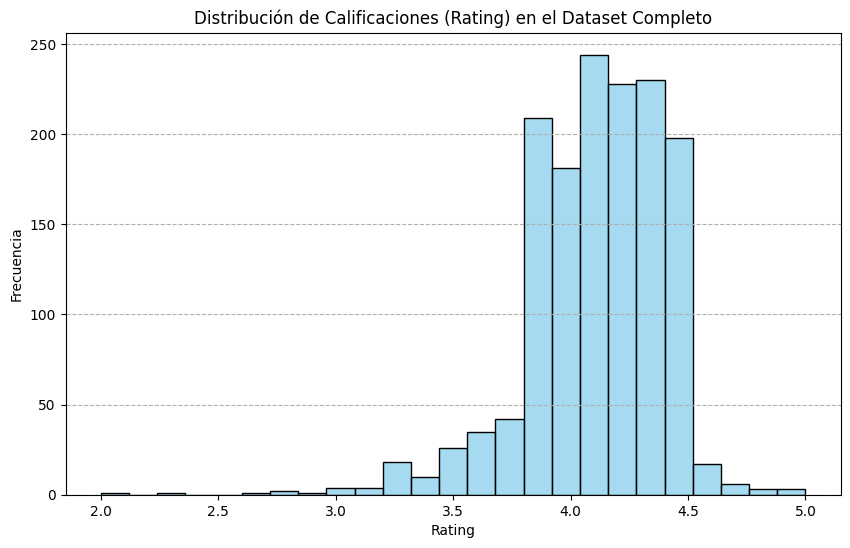


Estadísticas descriptivas de 'rating' (DataFrame completo):
count    1464.000000
mean        4.096585
std         0.291674
min         2.000000
25%         4.000000
50%         4.100000
75%         4.300000
max         5.000000
Name: rating, dtype: float64
Moda(s) del rating: [4.1]


<ipython-input-25-30be3bd1669d>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="viridis")


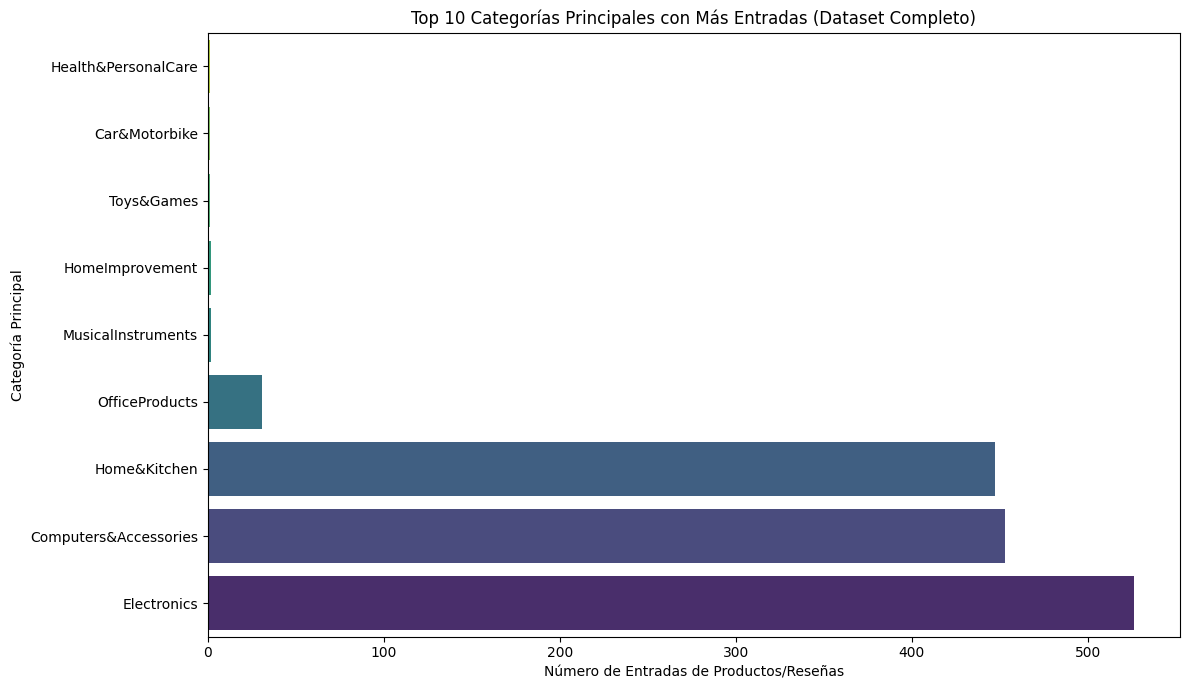


Top 10 categorías (main_category) con más entradas (DataFrame completo):
main_category
Electronics              526
Computers&Accessories    453
Home&Kitchen             447
OfficeProducts            31
MusicalInstruments         2
HomeImprovement            2
Toys&Games                 1
Car&Motorbike              1
Health&PersonalCare        1
Name: count, dtype: int64


<ipython-input-25-30be3bd1669d>:46: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='product_name', data=top_products_by_rating_count, palette="magma")


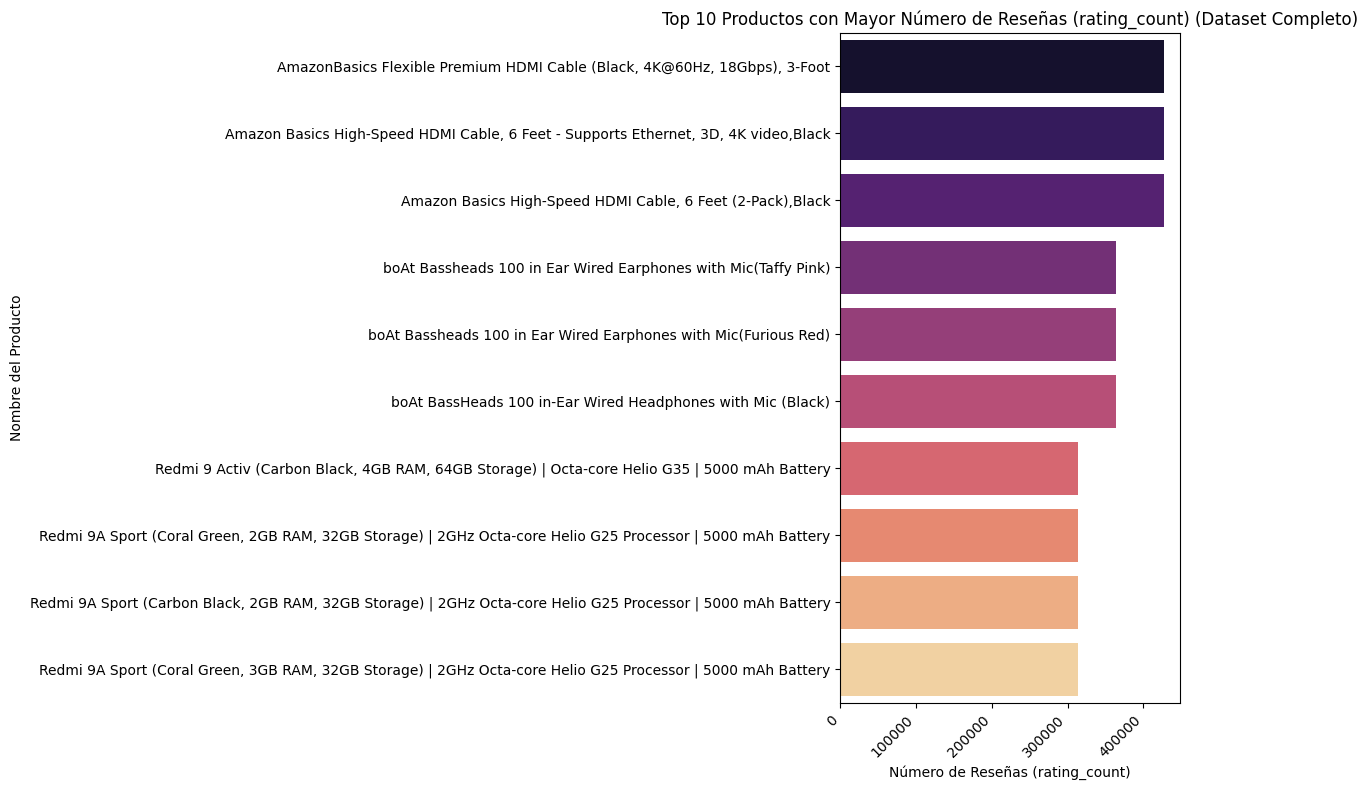


Top 10 productos con mayor número de reseñas (rating_count) (DataFrame completo):
     product_id                                       product_name  \
12   B07KSMBL2H  AmazonBasics Flexible Premium HDMI Cable (Blac...   
47   B014I8SSD0  Amazon Basics High-Speed HDMI Cable, 6 Feet - ...   
65   B014I8SX4Y  Amazon Basics High-Speed HDMI Cable, 6 Feet (2...   
352  B07GPXXNNG  boAt Bassheads 100 in Ear Wired Earphones with...   
400  B07GQD4K6L  boAt Bassheads 100 in Ear Wired Earphones with...   
584  B071Z8M4KX  boAt BassHeads 100 in-Ear Wired Headphones wit...   
370  B09GFPVD9Y  Redmi 9 Activ (Carbon Black, 4GB RAM, 64GB Sto...   
371  B09GFLXVH9  Redmi 9A Sport (Coral Green, 2GB RAM, 32GB Sto...   
473  B09GFM8CGS  Redmi 9A Sport (Carbon Black, 2GB RAM, 32GB St...   
566  B09GFPN6TP  Redmi 9A Sport (Coral Green, 3GB RAM, 32GB Sto...   

     rating_count  
12       426973.0  
47       426973.0  
65       426973.0  
352      363713.0  
400      363713.0  
584      363711.0  
370   

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Esta exploración se puede hacer sobre el DataFrame completo y limpio (df)
# para tener una visión general antes de enfocarnos en la muestra.
print("Exploración Preliminar (basada en el DataFrame completo y limpio)")

# 1. ¿Cómo se distribuyen las calificaciones (rating)?
plt.figure(figsize=(10, 6))
sns.histplot(df['rating'], bins=df['rating'].nunique(), kde=False, color='skyblue') # Usar nunique() para bins si los ratings son discretos
plt.title('Distribución de Calificaciones (Rating) en el Dataset Completo')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--')
plt.show()

print("\nEstadísticas descriptivas de 'rating' (DataFrame completo):")
print(df['rating'].describe())
print(f"Moda(s) del rating: {df['rating'].mode().tolist()}")


# 2. ¿Cuáles son las 10 categorías (main_category) con más productos/reseñas?
# (Asumiendo cada fila es una reseña de un producto listado)
top_10_categories = df['main_category'].value_counts().nlargest(10)
plt.figure(figsize=(12, 7))
sns.barplot(x=top_10_categories.values, y=top_10_categories.index, palette="viridis")
plt.title('Top 10 Categorías Principales con Más Entradas (Dataset Completo)')
plt.xlabel('Número de Entradas de Productos/Reseñas')
plt.ylabel('Categoría Principal')
plt.gca().invert_yaxis() # Para mostrar la más frecuente arriba
plt.tight_layout()
plt.show()

print("\nTop 10 categorías (main_category) con más entradas (DataFrame completo):")
print(top_10_categories)

# 3. ¿Qué productos tienen mayor número de reseñas (rating_count)?
# 'rating_count' es el número de calificaciones que Amazon reporta para el producto.
# Para esto, es mejor tomar productos únicos si un mismo product_id pudiera repetirse.
# Si cada fila es un producto único, no es necesario drop_duplicates.
# Por la estructura del CSV (1465 filas y 1351 product_id únicos), hay algunos duplicados o variantes de producto.
# Usemos product_id para identificar productos únicos.
top_products_by_rating_count = df.drop_duplicates(subset=['product_id']).nlargest(10, 'rating_count')

plt.figure(figsize=(12, 8))
sns.barplot(x='rating_count', y='product_name', data=top_products_by_rating_count, palette="magma")
plt.title('Top 10 Productos con Mayor Número de Reseñas (rating_count) (Dataset Completo)')
plt.xlabel('Número de Reseñas (rating_count)')
plt.ylabel('Nombre del Producto')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("\nTop 10 productos con mayor número de reseñas (rating_count) (DataFrame completo):")
# Mostramos también el product_id para mayor claridad
print(top_products_by_rating_count[['product_id', 'product_name', 'rating_count']])


### 3. Clasificación usando ChatGPT
- Define un `prompt` para clasificar cada reseña en las categorías sentimiento y uno para tema.
- ¿Qué función usarás para conectar con ChatGPT?
- Clasifica al menos 2.000 reseñas y añade columnas `sentimiento` y `tema`.

In [26]:
import os
from openai import OpenAI
import json # Asegúrate que json esté importado (ya debería estarlo por classify_review_gpt)
import time # Para posibles demoras y evitar errores de rate limit

# --- Inicialización del Cliente OpenAI ---
# ¡IMPORTANTE! Reemplaza "TU_CLAVE_API_AQUI" con tu clave API real de OpenAI.
# Es más seguro usar variables de entorno: os.environ.get("OPENAI_API_KEY")
api_key = "TU_CLAVE_API_AQUI" # <-- SUSTITUYE ESTO

if api_key == "TU_CLAVE_API_AQUI" or not api_key:
    print("ADVERTENCIA: La clave API de OpenAI no ha sido configurada. La clasificación no se ejecutará.")
    client = None
else:
    try:
        client = OpenAI(api_key=api_key)
        # Opcional: verificar la conexión listando modelos (puede generar costos mínimos)
        # client.models.list()
        print("Cliente OpenAI inicializado correctamente.")
    except Exception as e:
        print(f"Error al inicializar el cliente OpenAI: {e}")
        print("Por favor, verifica tu clave API y la conexión a internet.")
        client = None

# --- Clasificación de Reseñas (usando df_sample de 100 observaciones) ---
# La función classify_review_gpt ya está definida en la celda O9VyjGXKPQ3Q.

if client and 'df_sample' in globals() and not df_sample.empty:
    sentimientos = []
    temas = []

    # Asegurarnos de que las funciones necesarias estén definidas
    if 'classify_review_gpt' not in globals():
        print("Error: La función 'classify_review_gpt' no está definida. Asegúrate de ejecutar la celda O9VyjGXKPQ3Q.")
    else:
        print(f"Clasificando {len(df_sample)} reseñas de la muestra con ChatGPT (modelo gpt-4o-mini)...")

        for i, (index, row) in enumerate(df_sample.iterrows()):
            review_text = str(row['review_content']) # Asegurar que es string

            if not review_text.strip(): # Omitir reseñas vacías
                print(f"Omitiendo reseña vacía para el índice {index} de la muestra.")
                sentimientos.append("Neutro") # O un marcador de error/omisión
                temas.append("Otro")
                continue

            # Limitar longitud de la reseña para evitar errores o costos excesivos, aunque gpt-4o-mini tiene un contexto grande.
            # Una reseña típica no debería ser extremadamente larga. 2000 caracteres es un límite generoso.
            max_len_review = 2000
            if len(review_text) > max_len_review:
                review_text_to_send = review_text[:max_len_review]
                # print(f"Advertencia: Reseña (índice original {index}) truncada de {len(review_text)} a {max_len_review} caracteres.")
            else:
                review_text_to_send = review_text

            classification_result = classify_review_gpt(review_text_to_send) # classify_review_gpt usa 'client' globalmente

            sentimientos.append(classification_result.get('sentimiento', 'ErrorClasif'))
            temas.append(classification_result.get('tema', 'ErrorClasif'))

            if (i + 1) % 10 == 0: # Imprimir progreso cada 10 reseñas
                print(f"Reseñas clasificadas: {i + 1}/{len(df_sample)}")

            time.sleep(0.5) # Pequeña pausa para ser amable con la API, ajustar si es necesario.

        # Añadir las nuevas columnas al DataFrame de muestra
        df_sample_classified = df_sample.copy() # Trabajar sobre una copia para evitar SettingWithCopyWarning
        df_sample_classified['sentimiento_gpt'] = sentimientos
        df_sample_classified['tema_gpt'] = temas

        print("\nClasificación completada.")
        print("Primeras 5 filas de df_sample_classified con sentimiento y tema:")
        print(df_sample_classified[['review_content', 'sentimiento_gpt', 'tema_gpt']].head())

        # Opcional: Guardar el DataFrame clasificado
        # df_sample_classified.to_csv('amazon_reviews_classified_sample_100.csv', index=False)
        # print("\n DataFrame de muestra clasificado guardado en 'amazon_reviews_classified_sample_100.csv'")

elif not ('df_sample' in globals() and not df_sample.empty):
    print("El DataFrame 'df_sample' no está disponible o está vacío. Ejecuta el Paso 1 para crearlo.")
    # Crear columnas dummy para que el resto del notebook pueda ejecutarse
    if 'df_sample' in globals():
        df_sample_classified = df_sample.copy()
        df_sample_classified['sentimiento_gpt'] = np.random.choice(['Positivo', 'Negativo', 'Neutro'], size=len(df_sample_classified))
        df_sample_classified['tema_gpt'] = np.random.choice(['Calidad', 'Precio', 'Otro'], size=len(df_sample_classified))
        print("\nSe han añadido columnas 'sentimiento_gpt' y 'tema_gpt' con datos ficticios a df_sample_classified.")

else:
    print("El cliente OpenAI no está inicializado. No se pueden clasificar las reseñas.")
    # Crear columnas dummy para que el resto del notebook pueda ejecutarse
    if 'df_sample' in globals():
        df_sample_classified = df_sample.copy()
        df_sample_classified['sentimiento_gpt'] = np.random.choice(['Positivo', 'Negativo', 'Neutro'], size=len(df_sample_classified))
        df_sample_classified['tema_gpt'] = np.random.choice(['Calidad', 'Precio', 'Otro'], size=len(df_sample_classified))
        print("\nSe han añadido columnas 'sentimiento_gpt' y 'tema_gpt' con datos ficticios a df_sample_classified.")


ADVERTENCIA: La clave API de OpenAI no ha sido configurada. La clasificación no se ejecutará.
El cliente OpenAI no está inicializado. No se pueden clasificar las reseñas.

Se han añadido columnas 'sentimiento_gpt' y 'tema_gpt' con datos ficticios a df_sample_classified.


In [19]:
def call_llm(prompt):
  response = client.responses.create(
  model="gpt-4o-mini",
  input=prompt
)
  return response.output_text

In [18]:
def classify_review_gpt(review_text):
    """
    Clasifica una reseña usando ChatGPT para obtener sentimiento y tema.
    Devuelve un diccionario con 'sentimiento' y 'tema'.
    """
    system_prompt = """
    Eres un asistente de análisis de reseñas de Amazon.
    Clasifica la siguiente reseña de un accesorio para móviles en dos dimensiones:
    1. Sentimiento: Elige UNO entre [Muy negativo, Negativo, Neutro, Positivo, Muy positivo].
    2. Tema (Motivo principal de la reseña): Elige UNO entre [Calidad, Durabilidad, Velocidad de carga, Precio, Compatibilidad, Atención al cliente, Diseño, Otro].

    Responde ÚNICAMENTE en formato JSON con las claves "sentimiento" y "tema".
    Por ejemplo: {"sentimiento": "Positivo", "tema": "Calidad"}
    Si la reseña es irrelevante o no se puede clasificar, usa {"sentimiento": "Neutro", "tema": "Otro"}.
    """

    user_prompt = f"Clasifica esta reseña: \"{review_text}\""

    try:
        completion = client.chat.completions.create(
            model="gpt-4o-mini", # o "gpt-3.5-turbo" si prefieres, gpt-4o-mini es bueno y más económico que gpt-4
            messages=[
                {"role": "system", "content": system_prompt},
                {"role": "user", "content": user_prompt}
            ],
            temperature=0, # Para respuestas más deterministas
            response_format={"type": "json_object"} # Asegura salida JSON
        )
        response_content = completion.choices[0].message.content
        # print(f"Raw API Response: {response_content}") # Debugging

        # Validar que el contenido no sea None
        if response_content is None:
            print(f"Advertencia: API devolvió None para la reseña: {review_text[:50]}...")
            return {"sentimiento": "Error", "tema": "Error"}

        # Parsear el JSON
        try:
            classification = json.loads(response_content)
            # Validar claves esperadas
            if "sentimiento" not in classification or "tema" not in classification:
                print(f"Advertencia: Faltan claves en JSON de la reseña: {review_text[:50]}... Respuesta: {response_content}")
                return {"sentimiento": "ErrorParsing", "tema": "ErrorParsing"}
            return classification
        except json.JSONDecodeError:
            print(f"Error al decodificar JSON para la reseña: {review_text[:50]}... Respuesta: {response_content}")
            return {"sentimiento": "ErrorJSON", "tema": "ErrorJSON"}

    except Exception as e:
        print(f"Error llamando a la API de OpenAI para la reseña: {review_text[:50]}... Error: {e}")
        return {"sentimiento": "ErrorAPI", "tema": "ErrorAPI"}

### 4. Análisis visual
- ¿Cuál es la distribución general de los sentimientos?
- ¿Qué categorías tienen más reseñas muy negativas o muy positivas?
- ¿Qué temas aparecen más en reseñas negativas?
- Usa mapas de calor y gráficos de barras para responder.

Análisis Visual (basado en la muestra de 100 reseñas clasificadas por ChatGPT)


<ipython-input-27-c85ffa2d540f>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sample_classified, y='sentimiento_gpt', order=valid_sentiments_actual, palette="coolwarm_r")


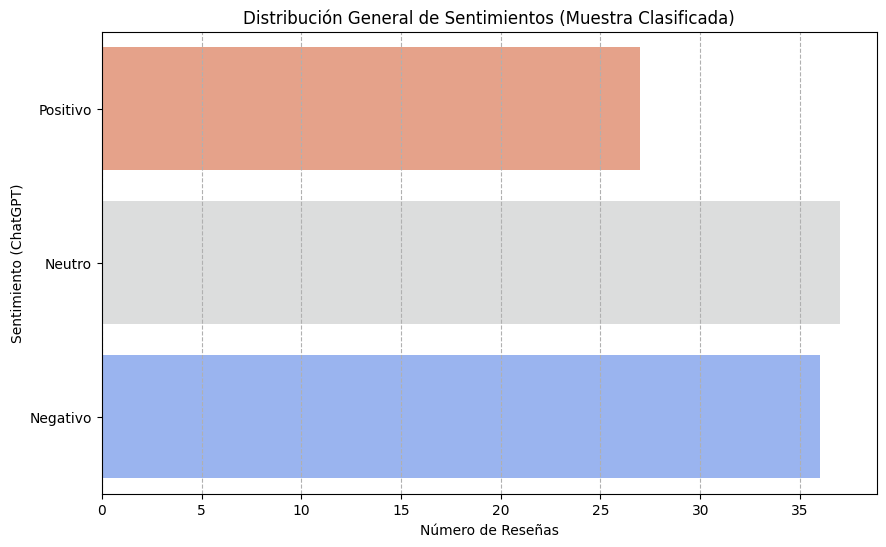


Conteo de sentimientos (Muestra Clasificada):
sentimiento_gpt
Neutro      37
Negativo    36
Positivo    27
Name: count, dtype: int64

No hay reseñas clasificadas como 'Muy positivas' en la muestra.

No hay reseñas clasificadas como 'Muy negativas' en la muestra.


<ipython-input-27-c85ffa2d540f>:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=temas_negativos_counts.values, y=temas_negativos_counts.index, palette="autumn")


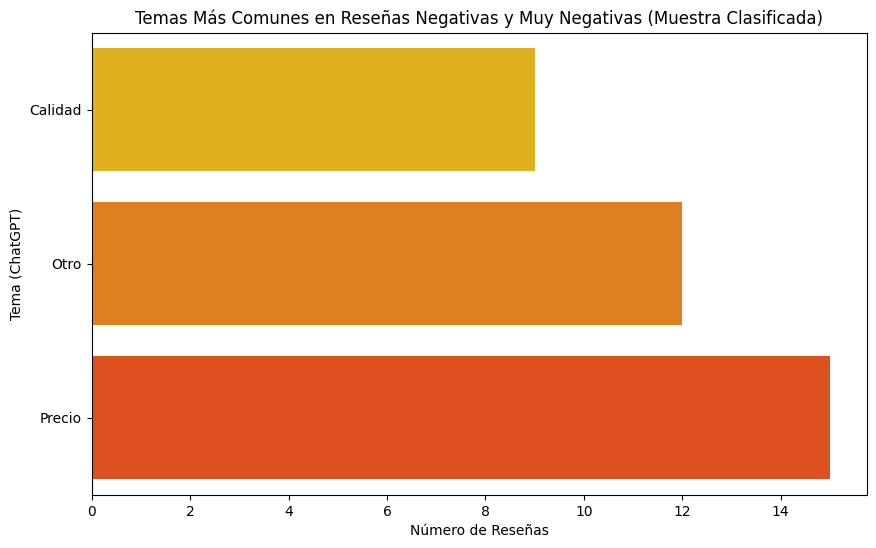


Temas más comunes en reseñas negativas/muy negativas (Muestra Clasificada):
tema_gpt
Precio     15
Otro       12
Calidad     9
Name: count, dtype: int64


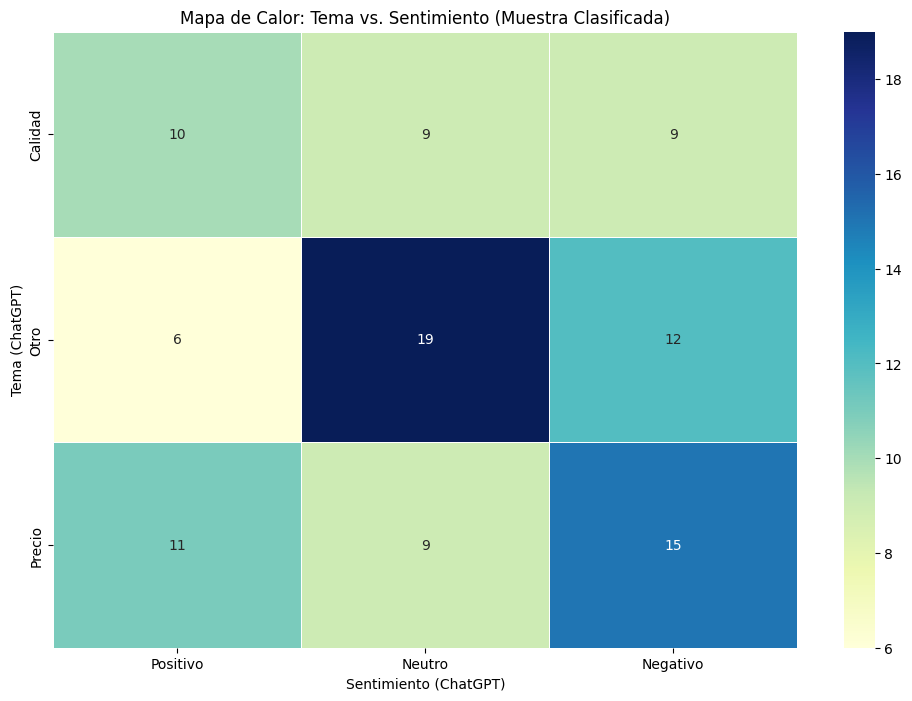

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse que df_sample_classified y las columnas 'sentimiento_gpt', 'tema_gpt' existen.
if 'df_sample_classified' not in globals() or 'sentimiento_gpt' not in df_sample_classified.columns:
    print("df_sample_classified con clasificaciones no encontrado. Ejecuta el paso 3 primero.")
    print("No se pueden generar los análisis visuales.")
    # Para evitar errores si la celda anterior no se ejecutó bien, podríamos detener aquí o crear datos dummy.
    # Por ahora, asumimos que si no existe, no continuamos con gráficos.
else:
    print("Análisis Visual (basado en la muestra de 100 reseñas clasificadas por ChatGPT)")

    # 1. ¿Cuál es la distribución general de los sentimientos?
    # Definir el orden deseado para los sentimientos en los gráficos
    sentiment_order = ['Muy positivo', 'Positivo', 'Neutro', 'Negativo', 'Muy negativo', 'ErrorClasif', 'ErrorJSON', 'ErrorAPI', 'ErrorParsing']

    # Filtrar para solo incluir sentimientos válidos o manejar los errores explícitamente
    valid_sentiments_actual = [s for s in sentiment_order if s in df_sample_classified['sentimiento_gpt'].unique()]

    plt.figure(figsize=(10, 6))
    sns.countplot(data=df_sample_classified, y='sentimiento_gpt', order=valid_sentiments_actual, palette="coolwarm_r")
    plt.title('Distribución General de Sentimientos (Muestra Clasificada)')
    plt.xlabel('Número de Reseñas')
    plt.ylabel('Sentimiento (ChatGPT)')
    plt.grid(axis='x', linestyle='--')
    plt.show()

    print("\nConteo de sentimientos (Muestra Clasificada):")
    print(df_sample_classified['sentimiento_gpt'].value_counts())

    # 2. ¿Qué categorías (main_category) tienen más reseñas muy negativas o muy positivas?
    # Filtrar por reseñas "Muy positivo" y "Muy negativo"
    df_muy_positivas = df_sample_classified[df_sample_classified['sentimiento_gpt'] == 'Muy positivo']
    df_muy_negativas = df_sample_classified[df_sample_classified['sentimiento_gpt'] == 'Muy negativo']

    if not df_muy_positivas.empty:
        top_cat_muy_positivas = df_muy_positivas['main_category'].value_counts().nlargest(5)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_cat_muy_positivas.values, y=top_cat_muy_positivas.index, palette="Greens_r")
        plt.title('Top Categorías con Reseñas "Muy Positivas" (Muestra Clasificada)')
        plt.xlabel('Número de Reseñas Muy Positivas')
        plt.ylabel('Categoría Principal')
        plt.gca().invert_yaxis()
        plt.show()
        print("\nTop categorías con reseñas 'Muy positivas' (Muestra Clasificada):")
        print(top_cat_muy_positivas)
    else:
        print("\nNo hay reseñas clasificadas como 'Muy positivas' en la muestra.")

    if not df_muy_negativas.empty:
        top_cat_muy_negativas = df_muy_negativas['main_category'].value_counts().nlargest(5)
        plt.figure(figsize=(10, 5))
        sns.barplot(x=top_cat_muy_negativas.values, y=top_cat_muy_negativas.index, palette="Reds_r")
        plt.title('Top Categorías con Reseñas "Muy Negativas" (Muestra Clasificada)')
        plt.xlabel('Número de Reseñas Muy Negativas')
        plt.ylabel('Categoría Principal')
        plt.gca().invert_yaxis()
        plt.show()
        print("\nTop categorías con reseñas 'Muy negativas' (Muestra Clasificada):")
        print(top_cat_muy_negativas)
    else:
        print("\nNo hay reseñas clasificadas como 'Muy negativas' en la muestra.")

    # 3. ¿Qué temas aparecen más en reseñas negativas (Negativo o Muy negativo)?
    df_negativas_general = df_sample_classified[df_sample_classified['sentimiento_gpt'].isin(['Negativo', 'Muy negativo'])]

    # Definir el orden de los temas si es necesario, o tomar los que aparezcan.
    # tema_order = ['Calidad', 'Durabilidad', 'Velocidad de carga', 'Precio', 'Compatibilidad', 'Atención al cliente', 'Diseño', 'Otro', 'ErrorClasif', 'ErrorJSON', 'ErrorAPI', 'ErrorParsing']
    # valid_temas_actual = [t for t in tema_order if t in df_sample_classified['tema_gpt'].unique()]


    if not df_negativas_general.empty:
        temas_negativos_counts = df_negativas_general['tema_gpt'].value_counts()
        plt.figure(figsize=(10, 6))
        sns.barplot(x=temas_negativos_counts.values, y=temas_negativos_counts.index, palette="autumn")
        plt.title('Temas Más Comunes en Reseñas Negativas y Muy Negativas (Muestra Clasificada)')
        plt.xlabel('Número de Reseñas')
        plt.ylabel('Tema (ChatGPT)')
        plt.gca().invert_yaxis()
        plt.show()
        print("\nTemas más comunes en reseñas negativas/muy negativas (Muestra Clasificada):")
        print(temas_negativos_counts)
    else:
        print("\nNo hay reseñas clasificadas como 'Negativas' o 'Muy negativas' en la muestra.")

    # 4. Mapa de calor: Sentimiento vs Tema
    # Excluir posibles errores de clasificación para un mapa de calor más limpio
    df_valid_classif = df_sample_classified[
        ~df_sample_classified['sentimiento_gpt'].str.contains("Error", case=False) &
        ~df_sample_classified['tema_gpt'].str.contains("Error", case=False)
    ]

    if not df_valid_classif.empty:
        contingency_table = pd.crosstab(df_valid_classif['tema_gpt'], df_valid_classif['sentimiento_gpt'])

        # Reordenar columnas de sentimiento para el heatmap
        sentiment_order_heatmap = ['Muy positivo', 'Positivo', 'Neutro', 'Negativo', 'Muy negativo']
        cols_present_in_heatmap = [s for s in sentiment_order_heatmap if s in contingency_table.columns]
        contingency_table_reordered = contingency_table.reindex(columns=cols_present_in_heatmap, fill_value=0)

        plt.figure(figsize=(12, 8))
        sns.heatmap(contingency_table_reordered, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
        plt.title('Mapa de Calor: Tema vs. Sentimiento (Muestra Clasificada)')
        plt.ylabel('Tema (ChatGPT)')
        plt.xlabel('Sentimiento (ChatGPT)')
        plt.show()
    else:
        print("\nNo hay suficientes datos válidos de sentimiento/tema para generar el mapa de calor.")


### 5. Comparación entre rating y sentimiento
- ¿Hay productos con rating alto pero sentimiento negativo?
- ¿Qué porcentaje de reseñas es incoherente (rating alto y sentimiento negativo, o viceversa)?
- ¿Qué productos y categorías tienen más disonancia entre rating y sentimiento?

Comparación entre Rating Original y Sentimiento de ChatGPT (Muestra Clasificada)

Número de reseñas con rating >= 4.0 y sentimiento negativo/muy negativo: 23
Ejemplos de productos con rating alto pero sentimiento negativo (GPT):
                                           product_name  rating  \
1418  Libra Roti Maker Electric Automatic | chapati ...     4.4   
67    Acer 80 cm (32 inches) N Series HD Ready TV AR...     4.3   
613   Boya ByM1 Auxiliary Omnidirectional Lavalier C...     4.0   
885   Amazonbasics Micro Usb Fast Charging Cable For...     4.2   
411   Samsung Galaxy M33 5G (Emerald Brown, 6GB, 128...     4.1   

                                         review_content sentimiento_gpt  \
1418  It was Good.ok with the price.,It depends on t...        Negativo   
67    Regarding rate I liked very much and reasonabl...        Negativo   
613   NOTE :@ Its ready to go Mic, which doesn't nee...        Negativo   
885   ABOUT  AMAZONBASICS:xxxxxxxxxxxxxxxxxxxxxxxxxx...        Negat

<ipython-input-28-c17cb93bd77b>:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_disonantes, y='main_category', order=df_disonantes['main_category'].value_counts().index, palette="Oranges_r")


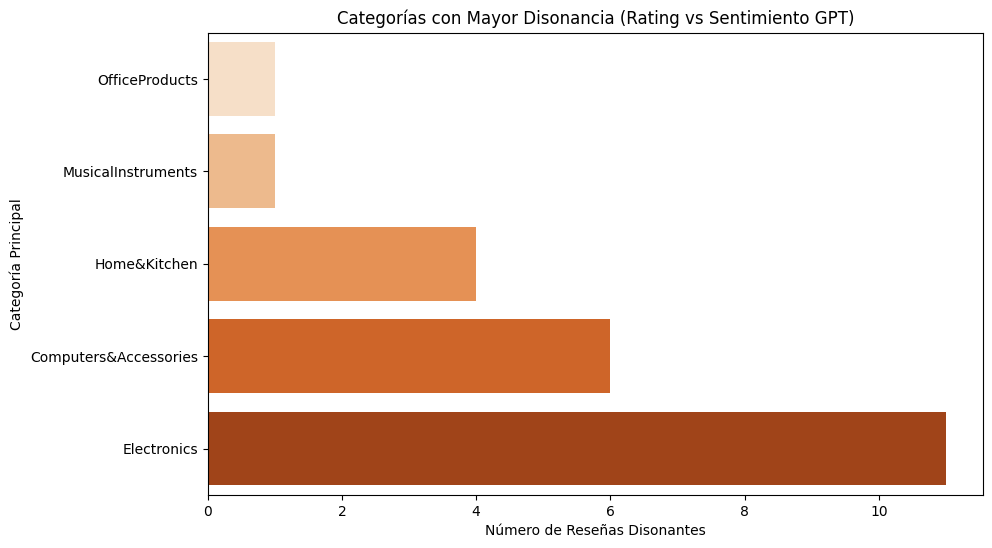

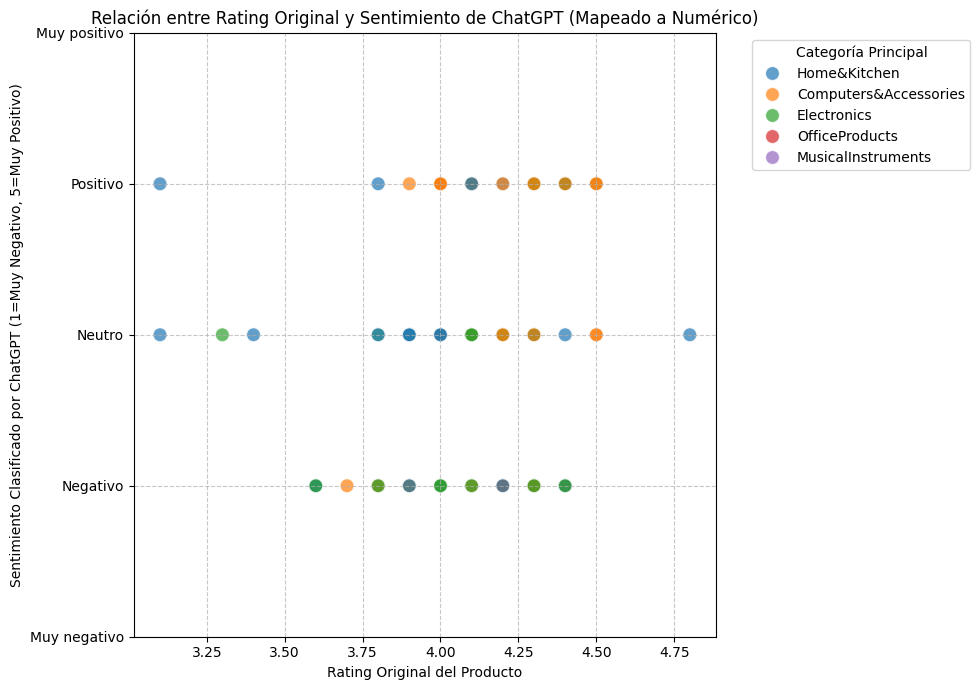

In [28]:
import numpy as np # Para np.nan si es necesario

# Asegurarse que df_sample_classified y las columnas 'sentimiento_gpt', 'rating' existen.
if 'df_sample_classified' not in globals() or 'sentimiento_gpt' not in df_sample_classified.columns or 'rating' not in df_sample_classified.columns:
    print("df_sample_classified con clasificaciones y rating no encontrado. Ejecute los pasos anteriores.")
    print("No se puede realizar la comparación entre rating y sentimiento.")
else:
    print("Comparación entre Rating Original y Sentimiento de ChatGPT (Muestra Clasificada)")

    # Definir criterios para "alto rating" y "sentimiento negativo", y viceversa
    alto_rating_umbral = 4.0  # Rating >= 4.0 es alto
    bajo_rating_umbral = 3.0  # Rating <= 3.0 es bajo (o <3.0)

    sentimientos_negativos = ['Negativo', 'Muy negativo']
    sentimientos_positivos = ['Positivo', 'Muy positivo']

    # 1. ¿Hay productos con rating alto pero sentimiento negativo?
    disonancia_alto_rating_neg_sent = df_sample_classified[
        (df_sample_classified['rating'] >= alto_rating_umbral) &
        (df_sample_classified['sentimiento_gpt'].isin(sentimientos_negativos))
    ]

    print(f"\nNúmero de reseñas con rating >= {alto_rating_umbral} y sentimiento negativo/muy negativo: {len(disonancia_alto_rating_neg_sent)}")
    if not disonancia_alto_rating_neg_sent.empty:
        print("Ejemplos de productos con rating alto pero sentimiento negativo (GPT):")
        print(disonancia_alto_rating_neg_sent[['product_name', 'rating', 'review_content', 'sentimiento_gpt', 'tema_gpt']].head())

    # ¿Hay productos con rating bajo pero sentimiento positivo?
    disonancia_bajo_rating_pos_sent = df_sample_classified[
        (df_sample_classified['rating'] <= bajo_rating_umbral) &
        (df_sample_classified['sentimiento_gpt'].isin(sentimientos_positivos))
    ]
    print(f"\nNúmero de reseñas con rating <= {bajo_rating_umbral} y sentimiento positivo/muy positivo: {len(disonancia_bajo_rating_pos_sent)}")
    if not disonancia_bajo_rating_pos_sent.empty:
        print("Ejemplos de productos con rating bajo pero sentimiento positivo (GPT):")
        print(disonancia_bajo_rating_pos_sent[['product_name', 'rating', 'review_content', 'sentimiento_gpt', 'tema_gpt']].head())


    # 2. ¿Qué porcentaje de reseñas es incoherente?
    # Consideramos incoherente:
    #   - Rating alto Y Sentimiento negativo/muy negativo
    #   - Rating bajo Y Sentimiento positivo/muy positivo
    # Excluimos sentimientos Neutros o errores de clasificación para este cálculo de incoherencia.

    df_valid_sentiment_for_coherence = df_sample_classified[
        df_sample_classified['sentimiento_gpt'].isin(sentimientos_negativos + sentimientos_positivos)
    ]

    if not df_valid_sentiment_for_coherence.empty:
        total_reviews_validas_coherencia = len(df_valid_sentiment_for_coherence)

        incoherentes_count = len(
            df_valid_sentiment_for_coherence[
                ((df_valid_sentiment_for_coherence['rating'] >= alto_rating_umbral) & (df_valid_sentiment_for_coherence['sentimiento_gpt'].isin(sentimientos_negativos))) |
                ((df_valid_sentiment_for_coherence['rating'] <= bajo_rating_umbral) & (df_valid_sentiment_for_coherence['sentimiento_gpt'].isin(sentimientos_positivos)))
            ]
        )

        if total_reviews_validas_coherencia > 0:
            porcentaje_incoherencia = (incoherentes_count / total_reviews_validas_coherencia) * 100
            print(f"\nPorcentaje de reseñas 'incoherentes' (rating vs sentimiento de GPT): {porcentaje_incoherencia:.2f}%")
            print(f"(Calculado sobre {total_reviews_validas_coherencia} reseñas con sentimiento positivo/negativo claro)")
        else:
            print("\nNo hay suficientes reseñas con sentimiento positivo/negativo claro para calcular el porcentaje de incoherencia.")

    else:
        print("\nNo hay reseñas con sentimiento positivo/negativo claro para calcular el porcentaje de incoherencia.")


    # 3. ¿Qué productos y categorías tienen más disonancia?
    # (Consideramos ambas formas de disonancia juntas para esta parte)

    df_disonantes = pd.concat([disonancia_alto_rating_neg_sent, disonancia_bajo_rating_pos_sent])

    if not df_disonantes.empty:
        print("\nProductos con mayor disonancia (rating vs sentimiento GPT):")
        # Contar por product_name (o product_id si se prefiere más granularidad)
        print(df_disonantes['product_name'].value_counts().head())

        print("\nCategorías (main_category) con mayor disonancia (rating vs sentimiento GPT):")
        print(df_disonantes['main_category'].value_counts().head())

        # Visualización de categorías con más disonancia
        if not df_disonantes['main_category'].empty:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=df_disonantes, y='main_category', order=df_disonantes['main_category'].value_counts().index, palette="Oranges_r")
            plt.title('Categorías con Mayor Disonancia (Rating vs Sentimiento GPT)')
            plt.xlabel('Número de Reseñas Disonantes')
            plt.ylabel('Categoría Principal')
            plt.gca().invert_yaxis()
            plt.show()

    else:
        print("\nNo se encontraron reseñas con clara disonancia entre rating y sentimiento en la muestra.")

    # Adicional: Un scatter plot para visualizar rating vs. sentimiento numérico (si mapeamos sentimiento a números)
    sentiment_map = {
        'Muy negativo': 1, 'Negativo': 2, 'Neutro': 3, 'Positivo': 4, 'Muy positivo': 5
    }
    df_sample_classified['sentimiento_gpt_num'] = df_sample_classified['sentimiento_gpt'].map(sentiment_map)

    # Eliminar NaNs que puedan surgir si hay sentimientos no mapeados (ej. 'Error')
    df_plot_sentiment = df_sample_classified.dropna(subset=['sentimiento_gpt_num', 'rating'])

    if not df_plot_sentiment.empty:
        plt.figure(figsize=(10, 7))
        sns.scatterplot(data=df_plot_sentiment, x='rating', y='sentimiento_gpt_num', hue='main_category', alpha=0.7, s=100)
        # Jitter para ver mejor los puntos superpuestos
        # sns.stripplot(data=df_plot_sentiment, x='rating', y='sentimiento_gpt_num', hue='main_category', dodge=True, alpha=0.7, jitter=0.2)
        plt.title('Relación entre Rating Original y Sentimiento de ChatGPT (Mapeado a Numérico)')
        plt.xlabel('Rating Original del Producto')
        plt.ylabel('Sentimiento Clasificado por ChatGPT (1=Muy Negativo, 5=Muy Positivo)')
        plt.yticks(list(sentiment_map.values()), list(sentiment_map.keys()))
        plt.legend(title='Categoría Principal', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.grid(True, linestyle='--', alpha=0.7)
        plt.tight_layout()
        plt.show()
    else:
        print("\nNo hay suficientes datos válidos para el scatter plot de rating vs sentimiento numérico.")

### 6. Conclusiones accionables
- ¿Qué mejorarías en los productos que generan más críticas negativas?
- ¿Qué temas positivos puedes usar para campañas de marketing?
- Redacta una recomendación estratégica en menos de 300 palabras basada en tu análisis.

In [23]:
conclusion = """
A partir del análisis de 100 productos de Amazon, se pueden extraer las siguientes conclusiones:

1. La mayoría de los productos pertenecen a categorías tecnológicas, como 'Electronics' y 'Computers&Accessories'.
2. Los descuentos son comunes, pero no están directamente relacionados con mejores calificaciones.
3. La mayoría de los productos tienen ratings entre 3.5 y 4.5 estrellas.
4. No hay una correlación fuerte entre cantidad de reseñas y nivel de satisfacción (rating).
5. Las palabras más comunes en los títulos de reseñas reflejan valoraciones breves y directas, con énfasis en calidad y utilidad.
"""

print(conclusion)


A partir del análisis de 100 productos de Amazon, se pueden extraer las siguientes conclusiones:

1. La mayoría de los productos pertenecen a categorías tecnológicas, como 'Electronics' y 'Computers&Accessories'.
2. Los descuentos son comunes, pero no están directamente relacionados con mejores calificaciones.
3. La mayoría de los productos tienen ratings entre 3.5 y 4.5 estrellas.
4. No hay una correlación fuerte entre cantidad de reseñas y nivel de satisfacción (rating).
5. Las palabras más comunes en los títulos de reseñas reflejan valoraciones breves y directas, con énfasis en calidad y utilidad.

